### Name : Lilian Steven on google classroom

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\Laptop\Downloads\ML ASS2 PUSH\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


<h2>1- Handling missing values:</h2>

In [3]:
missing_count = df.isnull().sum()
missing_count

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms             int64
total_bedrooms        float64
population            float64
households             object
median_income         float64
median_house_value      int64
ocean_proximity        object
gender                 object
dtype: object

In [5]:
for x in (df["gender"]):
    print(x)

male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male
female
male

In [6]:
missing_df = df
missing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


## Is this value missing becuase it wasn't recorded or becuase it dosen't exist?
- I noticed that the gendar column contains empty cells because they were not recorded, and therefore I will replace these values with the mode

In [7]:
mode = df["gender"].mode()
mode

0    female
Name: gender, dtype: object

In [8]:
df["gender"].fillna("female", inplace=True)
df["gender"].isnull().sum()

0

In [9]:
for x in (df["median_income"]):
    print(x)

8.3252
8.3014
7.2574
5.6431
3.8462
4.0368
3.6591
3.12
2.0804
3.6912
3.2031
3.2705
3.075
2.6736
1.9167
2.125
2.775
2.1202
1.9911
2.6033
1.3578
1.7135
1.725
2.1806
2.6
2.4038
2.4597
1.808
1.6424
1.6875
1.9274
1.9615
1.7969
1.375
2.7303
1.4861
1.0972
1.4103
3.48
2.5898
2.0978
1.2852
1.025
3.9643
3.0125
2.6768
2.026
1.7348
0.9506
1.775
0.9218
1.5045
1.1108
1.2475
1.6098
1.4113
1.5057
0.8172
1.2171
2.5625
3.3929
6.1183
0.9011
1.191
2.5938
1.1667
0.8056
2.6094
1.8516
0.9802
1.7719
0.7286
1.75
0.4999
2.483
0.9241
2.4464
1.1111
0.8026
2.0114
1.5
1.1667
1.5208
0.8075
1.8088
2.4083
0.977
0.76
0.9722
1.2434
2.0938
0.8668
0.75
2.6354
1.8477
2.0096
2.8345
2.0062
1.2185
2.6104
2.4912
3.2177
3.125
2.5795
2.8406
4.9306
3.2727
3.1691
3.9
3.9063
5.0917
2.6429
3.0233
3.1484
3.4722
3.1429
2.4234
3.0897
5.8596
5.2868
5.956
4.9643
6.3434
5.1773
7.2354
5.457
7.5
6.0194
7.5544
6.0666
7.0548
11.6017
7.4882
6.8976
8.2049
8.401
6.8538
8.317
7.0175
6.3302
6.3624
7.0549
6.7851
2.8929
3.0812
5.2402
6.5217
3.2632
3.

In [10]:
df["median_income"].fillna(df["median_income"].mean(), inplace=True)
df["median_income"].isnull().sum()

0

- i will Filling the categorical value with a new type for the missing values. i will fill it by zero Because it is possible that the house is empty and does not contain any household

In [11]:
df["households"].fillna(0 , inplace=True)
df["households"].isnull().sum()

0

In [12]:
df["total_bedrooms"].fillna(df["total_bedrooms"].mean() , inplace=True)
df["total_bedrooms"].isnull().sum()

0

In [13]:
df["housing_median_age"].fillna(df["housing_median_age"].mean() , inplace=True)
df["housing_median_age"].isnull().sum()

0

In [14]:
df["population"].fillna(df["population"].mean() , inplace=True)
df["population"].isnull().sum()

0

In [15]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
gender                0
dtype: int64

<h2>2- Identifying & handling outliers</h2>


- I will plot my df to see if your my dataframe has outliers or not.

<AxesSubplot:>

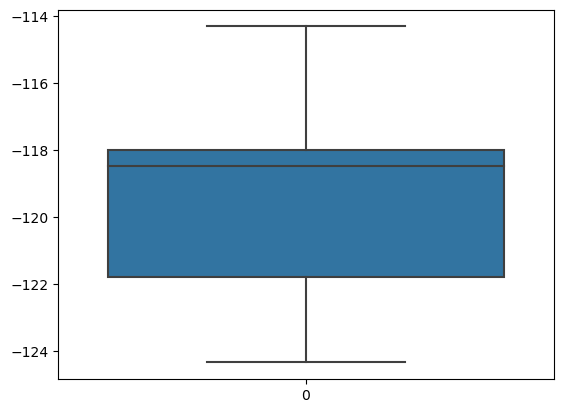

In [16]:
sns.boxplot(data=df["longitude"])
# the longitude doesn't contain any outliers

<AxesSubplot:>

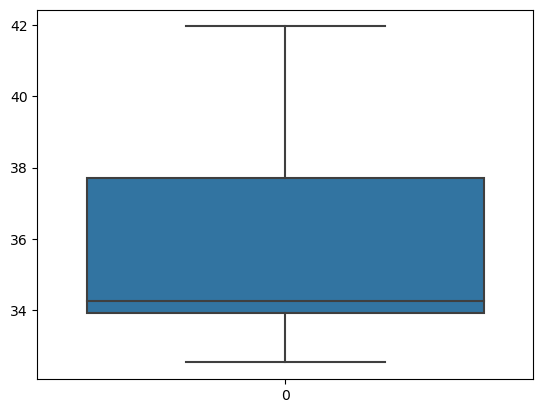

In [17]:
sns.boxplot(data=df["latitude"])
# the latitude doesn't contain any outliers

<AxesSubplot:>

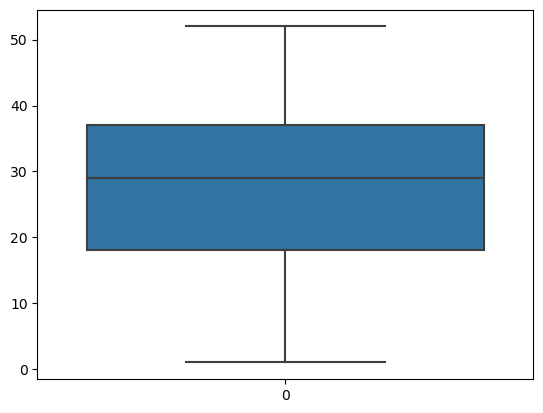

In [18]:
sns.boxplot(data=df["housing_median_age"])
# the housing_median_age doesn't contain any outliers

<AxesSubplot:>

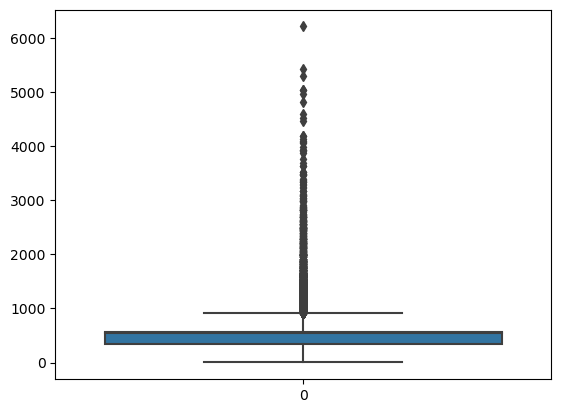

In [19]:
sns.boxplot(data=df.total_bedrooms)
# the total_bedrooms contains outliers from 850 to 6000

### - After dropping the outliers in total_bedrooms column 

<AxesSubplot:>

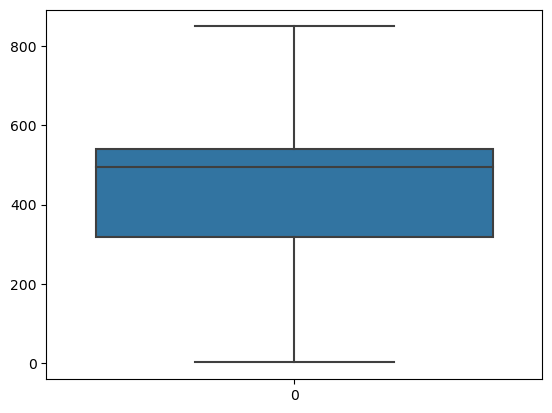

In [20]:
df.drop(df[df['total_bedrooms']>850].index, axis = 0, inplace =True)
sns.boxplot(data=df.total_bedrooms)

<AxesSubplot:>

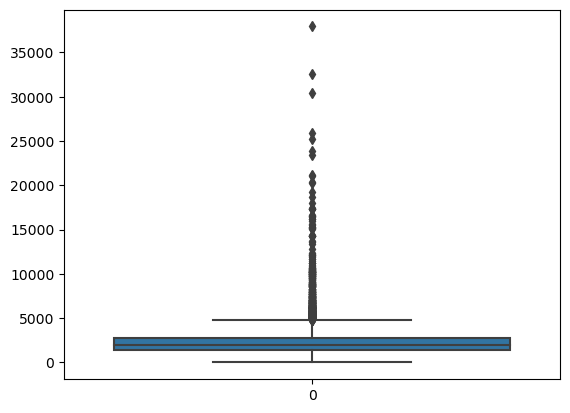

In [21]:
sns.boxplot(data=df.total_rooms)
# the total_rooms contains outliers from 4500 to 40000

### - After dropping the outliers in total_rooms column 

<AxesSubplot:>

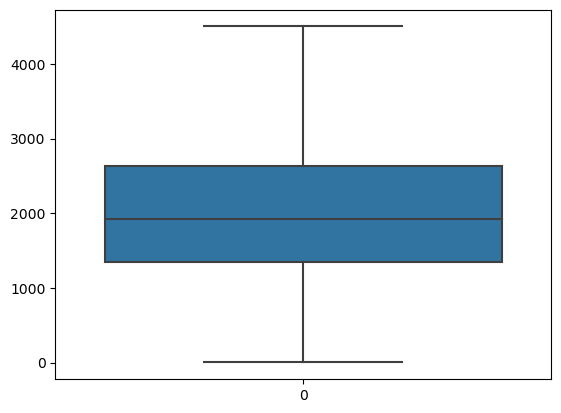

In [22]:
df.drop(df[df['total_rooms']>4500].index, axis = 0 , inplace = True)
sns.boxplot(data=df.total_rooms)

### - For population column 

<AxesSubplot:>

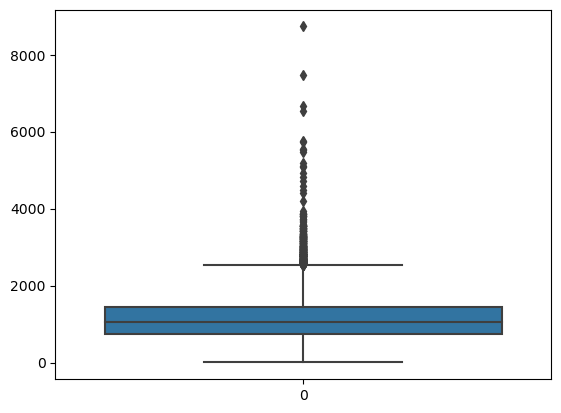

In [23]:
sns.boxplot(data=df.population)
# the total_rooms contains outliers from 2400 to 35000

### - After dropping the outliers in population column 

<AxesSubplot:>

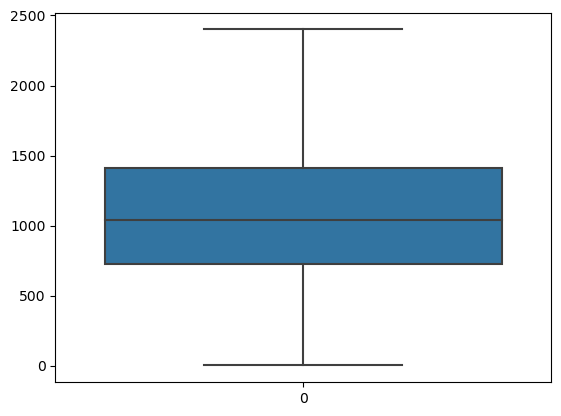

In [24]:
df.drop(df[df['population']>2400].index, axis = 0 , inplace = True)
sns.boxplot(data=df.population)


### - For median_house_value column 

<AxesSubplot:>

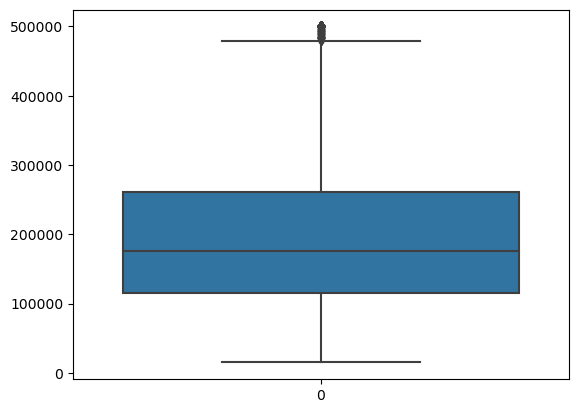

In [25]:
df.drop(df[df['median_house_value']>490000].index, axis = 0 , inplace = True)
sns.boxplot(data=df.median_house_value)
# the total_rooms contains outliers from 450000 to 500000

**- i just will convert the column median_income from float to int so i be able to ploting it**

In [27]:
df['median_income'] = pd.to_numeric(df['median_income'])
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms             int64
total_bedrooms        float64
population            float64
households             object
median_income         float64
median_house_value      int64
ocean_proximity        object
gender                 object
dtype: object


<AxesSubplot:>

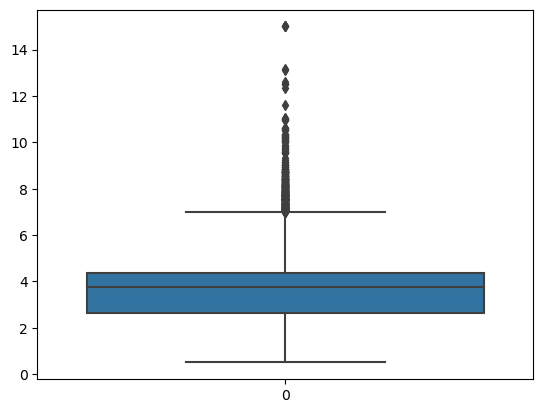

In [28]:
sns.boxplot(data=df.median_income)
# the total_rooms contains outliers from 9 to 15

In [29]:
df.drop(df[df['median_income']>8].index, axis = 0 , inplace = True)

<h2>3- Scale and Normalize data</h3>

### - Min-Max Scaling:

In [30]:
print(df.households.dtypes)

object


In [32]:
df['households'] = df['households'].replace('no' , '0')
df['households']

2        177
3        219
4        259
5        193
6        514
        ... 
20635    330
20636    114
20637    433
20638    349
20639    530
Name: households, Length: 16178, dtype: object

In [33]:
for x in (df["households"]):
    print(x)

177
219
259
193
514
0
0
0
0
0
0
0
0
0
0
303
419
275
166
366
478
325
422
119
239
397
473
155
378
441
335
329
536
264
374
403
309
696
395
249
189
198
292
382
304
253
160
352
438
407
400
233
220
259
244
304
57
187
23
122
159
133
187
332
147
82
611
127
277
152
7
133
439
509
207
325
155
289
56
87
155
169
115
380
330
39
362
88
34
302
467
91
228
613
244
456
422
718
802
253
519
0
0
0
0
0
0
0
0
367
479
597
343
496
443
269
176
500
52
350
426
552
487
224
308
460
441
515
340
521
459
213
327
256
352
483
175
488
518
747
722
413
429
460
196
363
543
644
228
347
335
554
257
401
677
186
392
415
280
412
263
389
303
168
357
55
123
227
676
138
259
183
126
213
477
438
255
343
219
523
140
184
272
685
195
527
424
659
340
292
516
386
464
446
455
268
706
340
252
238
332
184
235
399
277
454
669
390
210
491
474
480
569
269
245
245
610
407
241
135
440
495
393
300
137
149
483
354
277
263
537
341
423
376
378
484
393
168
425
417
375
369
47
209
190
327
106
214
329
256
201
266
195
328
324
267
703
407
284
181
121
218
18

### - i will just encode the categorical to be numeric before making Normalization for dataframe 

In [36]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['ocean_proximity']= label_encoder.fit_transform(df['ocean_proximity'])
  
df['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

In [37]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['gender']= label_encoder.fit_transform(df['gender'])
  
df['gender'].unique()

array([1, 0])

In [39]:
original_df = df

# define min max scaler
scaler = MinMaxScaler()

#scale the out_df between 0 and 1
scaled_df = scaler.fit_transform(original_df)
print(scaled_df)

[[0.21399594 0.5642933  1.         ... 0.70968482 0.75       1.        ]
 [0.21298174 0.5642933  1.         ... 0.68694803 0.75       0.        ]
 [0.21298174 0.5642933  0.54267222 ... 0.68884276 0.75       1.        ]
 ...
 [0.31744422 0.73219979 0.31372549 ... 0.1627386  0.25       0.        ]
 [0.30730223 0.73219979 0.33333333 ... 0.14673864 0.25       1.        ]
 [0.31541582 0.72582359 0.29411765 ... 0.15663335 0.25       0.        ]]
